### set up

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import bisect
import seaborn as sns
import LCDMSphere
import Energy_loss_class
import IGM

from scipy import integrate
from scipy import interpolate
from importlib import reload
import temp_history

### Khaire's model at mean density

In [2]:
IGM_00 = IGM.IGM_N(0, 0)
N_00, P_00, P_00_eV = IGM_00.get_P()

In [3]:
idx_z0 = -1
idx_z1 = 299
idx_z2 = 240
idx_z3 = 199
idx_z4 = 167
idx_z5 = 141
idx_z6 = 118

In [4]:
print(IGM_00.z[idx_z0])
print(IGM_00.z[idx_z1])
print(IGM_00.z[idx_z2])
print(IGM_00.z[idx_z3])
print(IGM_00.z[idx_z4])
print(IGM_00.z[idx_z5])
print(IGM_00.z[idx_z6])

0.0034865215755159884
0.9965406448648099
2.0083681725319145
3.000024143240167
3.9961289481282973
4.9854608926360555
6.02276316653046


In [5]:
E2N_z0 = np.zeros((IGM.mstep,))
for i in range(IGM.mstep):
    E2N_z0[i] = IGM.E[i]**2 * N_00[i][idx_z0]/1.602e-12
    
E2N_z1 = np.zeros((IGM.mstep,))
for i in range(IGM.mstep):
    E2N_z1[i] = IGM.E[i]**2 * N_00[i][idx_z1]/1.602e-12
    
E2N_z2 = np.zeros((IGM.mstep,))
for i in range(IGM.mstep):
    E2N_z2[i] = IGM.E[i]**2 * N_00[i][idx_z2]/1.602e-12
    
E2N_z3 = np.zeros((IGM.mstep,))
for i in range(IGM.mstep):
    E2N_z3[i] = IGM.E[i]**2 * N_00[i][idx_z3]/1.602e-12
    
E2N_z4 = np.zeros((IGM.mstep,))
for i in range(IGM.mstep):
    E2N_z4[i] = IGM.E[i]**2 * N_00[i][idx_z4]/1.602e-12
    
E2N_z5 = np.zeros((IGM.mstep,))
for i in range(IGM.mstep):
    E2N_z5[i] = IGM.E[i]**2 * N_00[i][idx_z5]/1.602e-12
    
E2N_z6 = np.zeros((IGM.mstep,))
for i in range(IGM.mstep):
    E2N_z6[i] = IGM.E[i]**2 * N_00[i][idx_z6]/1.602e-12

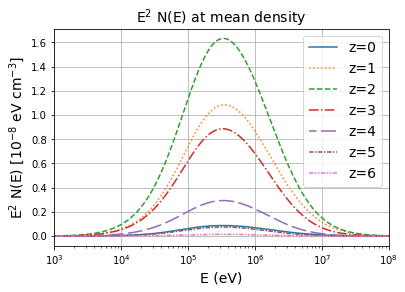

In [6]:
plt.plot(IGM.E_mid/1.602e-12, E2N_z0/1e-8, '-', label = 'z=0')
plt.plot(IGM.E_mid/1.602e-12, E2N_z1/1e-8, ':', label = 'z=1')
plt.plot(IGM.E_mid/1.602e-12, E2N_z2/1e-8, '--', label = 'z=2')
plt.plot(IGM.E_mid/1.602e-12, E2N_z3/1e-8, '-.', label = 'z=3')
plt.plot(IGM.E_mid/1.602e-12, E2N_z4/1e-8, linestyle=(5, (10, 3)), label = 'z=4')
plt.plot(IGM.E_mid/1.602e-12, E2N_z5/1e-8, linestyle=(0, (3, 1, 1, 1)), label = 'z=5')
plt.plot(IGM.E_mid/1.602e-12, E2N_z6/1e-8, linestyle=(0, (3, 1, 1, 1, 1, 1)), label = 'z=6')
plt.xscale('log')
plt.xlim([1e3,1e8])
plt.legend(fontsize = 14, loc = 'upper right')
plt.title('$\mathrm{E^2\ N(E)}$ at mean density', fontsize = 14)
plt.xlabel('E (eV)', fontsize = 14)
plt.ylabel('$\mathrm{E^2\ N(E)\ [10^{-8}\ eV\ cm^{-3}}]$', fontsize = 14)
plt.grid()
plt.savefig('NE_diffz.pdf')
plt.show()

### compare to Haardt's model

In [7]:
IGM_01 = IGM.IGM_N(0, 1)
N_01, P_01, P_01_eV = IGM_01.get_P()

In [8]:
E2N_z0 = np.zeros((IGM.mstep,))
for i in range(IGM.mstep):
    E2N_z0[i] = IGM.E[i]**2 * N_01[i][idx_z0]/1.602e-12
    
E2N_z1 = np.zeros((IGM.mstep,))
for i in range(IGM.mstep):
    E2N_z1[i] = IGM.E[i]**2 * N_01[i][idx_z1]/1.602e-12
    
E2N_z2 = np.zeros((IGM.mstep,))
for i in range(IGM.mstep):
    E2N_z2[i] = IGM.E[i]**2 * N_01[i][idx_z2]/1.602e-12
    
E2N_z3 = np.zeros((IGM.mstep,))
for i in range(IGM.mstep):
    E2N_z3[i] = IGM.E[i]**2 * N_01[i][idx_z3]/1.602e-12
    
E2N_z4 = np.zeros((IGM.mstep,))
for i in range(IGM.mstep):
    E2N_z4[i] = IGM.E[i]**2 * N_01[i][idx_z4]/1.602e-12
    
E2N_z5 = np.zeros((IGM.mstep,))
for i in range(IGM.mstep):
    E2N_z5[i] = IGM.E[i]**2 * N_01[i][idx_z5]/1.602e-12
    
E2N_z6 = np.zeros((IGM.mstep,))
for i in range(IGM.mstep):
    E2N_z6[i] = IGM.E[i]**2 * N_01[i][idx_z6]/1.602e-12

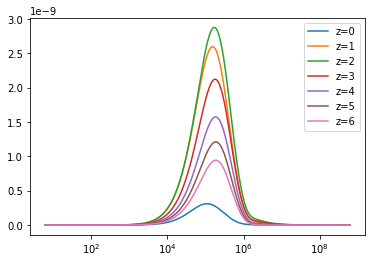

In [9]:
plt.plot(IGM.E_mid/1.602e-12, E2N_z0, label = 'z=0')
plt.plot(IGM.E_mid/1.602e-12, E2N_z1, label = 'z=1')
plt.plot(IGM.E_mid/1.602e-12, E2N_z2, label = 'z=2')
plt.plot(IGM.E_mid/1.602e-12, E2N_z3, label = 'z=3')
plt.plot(IGM.E_mid/1.602e-12, E2N_z4, label = 'z=4')
plt.plot(IGM.E_mid/1.602e-12, E2N_z5, label = 'z=5')
plt.plot(IGM.E_mid/1.602e-12, E2N_z6, label = 'z=6')
plt.xscale('log')
plt.legend(loc = 'upper right')
plt.show()

### compare to other overdensity at z = 2

In [10]:
IGM_neg10 = IGM.IGM_N(-1, 0)
N_neg10, P_neg10, P_neg10_eV = IGM_neg10.get_P()

IGM_neg50 = IGM.IGM_N(-0.5, 0)
N_neg50, P_neg50, P_neg50_eV = IGM_neg50.get_P()

IGM_50 = IGM.IGM_N(0.5, 0)
N_50, P_50, P_50_eV = IGM_50.get_P()

IGM_10 = IGM.IGM_N(1, 0)
N_10, P_10, P_10_eV = IGM_10.get_P()

In [11]:
E2N_00 = np.zeros((IGM.mstep,))
for i in range(IGM.mstep):
    E2N_00[i] = IGM.E[i]**2 * N_00[i][idx_z2]/1.602e-12
    
E2N_neg10 = np.zeros((IGM.mstep,))
for i in range(IGM.mstep):
    E2N_neg10[i] = IGM.E[i]**2 * N_neg10[i][idx_z2]/1.602e-12
    
E2N_neg50 = np.zeros((IGM.mstep,))
for i in range(IGM.mstep):
    E2N_neg50[i] = IGM.E[i]**2 * N_neg50[i][idx_z2]/1.602e-12
    
E2N_50 = np.zeros((IGM.mstep,))
for i in range(IGM.mstep):
    E2N_50[i] = IGM.E[i]**2 * N_50[i][idx_z2]/1.602e-12
    
E2N_10 = np.zeros((IGM.mstep,))
for i in range(IGM.mstep):
    E2N_10[i] = IGM.E[i]**2 * N_10[i][idx_z2]/1.602e-12

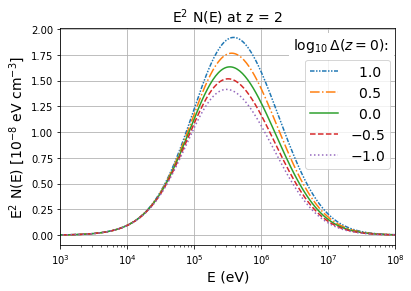

In [17]:
plt.plot(IGM.E_mid/1.602e-12, E2N_10/1e-8, linestyle = (0, (3, 1, 1, 1, 1, 1)), label = '  1.0')
plt.plot(IGM.E_mid/1.602e-12, E2N_50/1e-8, '-.', label = '  0.5')
plt.plot(IGM.E_mid/1.602e-12, E2N_00/1e-8, '-', label = '  0.0')
plt.plot(IGM.E_mid/1.602e-12, E2N_neg50/1e-8, '--', label = '$-$0.5')
plt.plot(IGM.E_mid/1.602e-12, E2N_neg10/1e-8, ':', label = '$-$1.0')
plt.xscale('log')
plt.xlim([1e3,1e8])
plt.text(3.e6,1.8,'$\log_{10}\Delta(z=0)$:', fontsize = 14, backgroundcolor='white')
plt.legend(loc = (.73,.35), fontsize = 14)
plt.title('$\mathrm{E^2\ N(E)}$ at z = 2', fontsize = 14)
plt.xlabel('E (eV)', fontsize = 14)
plt.ylabel('$\mathrm{E^2\ N(E)\ [10^{-8}\ eV\ cm^{-3}}]$', fontsize = 14)
#plt.ylim([-1e-9,2.2e-8])
plt.grid()
plt.savefig('NE_diffD.pdf')
plt.show()

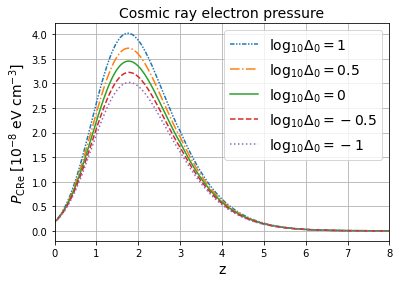

In [14]:
plt.plot(IGM_10.z, np.array(P_10_eV)/1e-8, linestyle = (0, (3, 1, 1, 1, 1, 1)), label = '$\mathrm{log_{10}}\Delta_0=1$')
plt.plot(IGM_50.z, np.array(P_50_eV)/1e-8, '-.', label = '$\mathrm{log_{10}}\Delta_0=0.5$')
plt.plot(IGM_00.z, np.array(P_00_eV)/1e-8, '-', label = '$\mathrm{log_{10}}\Delta_0=0$')
plt.plot(IGM_neg50.z, np.array(P_neg50_eV)/1e-8, '--', label = '$\mathrm{log_{10}}\Delta_0=-0.5$')
plt.plot(IGM_neg10.z, np.array(P_neg10_eV)/1e-8, ':', label = '$\mathrm{log_{10}}\Delta_0=-1$')
plt.legend(loc = 'upper right', fontsize = 14)
plt.title('Cosmic ray electron pressure', fontsize = 14)
plt.xlabel('z', fontsize = 14)
plt.ylabel('$P_{\mathrm{CRe}}$ [$\mathrm{10^{-8}\ eV\ cm^{-3}}$]', fontsize = 14)
plt.xlim(0, 8)
plt.grid()
plt.savefig('P.pdf')
plt.show()

In [15]:
utot_00, E_eV_00 = IGM_00.get_utot()

utot_neg10, E_eV_neg10 = IGM_neg10.get_utot()

utot_neg50, E_eV_neg50 = IGM_neg50.get_utot()

utot_50, E_eV_50 = IGM_50.get_utot()

utot_10, E_eV_10 = IGM_10.get_utot()

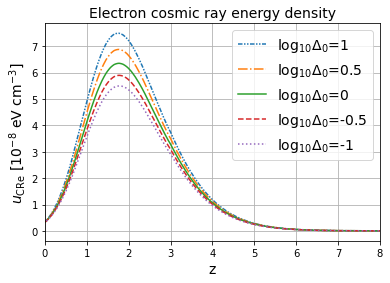

In [16]:
plt.plot(IGM_10.z, utot_10/1.602e-12/1e-8, linestyle = (0, (3, 1, 1, 1, 1, 1)), label = '$\mathrm{log_{10}}\Delta_0$=1')
plt.plot(IGM_50.z, utot_50/1.602e-12/1e-8, '-.', label = '$\mathrm{log_{10}}\Delta_0$=0.5')
plt.plot(IGM_00.z, utot_00/1.602e-12/1e-8, '-', label = '$\mathrm{log_{10}}\Delta_0$=0')
plt.plot(IGM_neg50.z, utot_neg50/1.602e-12/1e-8, '--', label = '$\mathrm{log_{10}}\Delta_0$=-0.5')
plt.plot(IGM_neg10.z, utot_neg10/1.602e-12/1e-8, ':', label = '$\mathrm{log_{10}}\Delta_0$=-1')
plt.legend(loc = 'upper right', fontsize = 14)
plt.title('Electron cosmic ray energy density', fontsize = 14)
plt.xlabel('z', fontsize = 14)
plt.ylabel('$u_{\mathrm{CRe}}$ [$\mathrm{10^{-8}\ eV\ cm^{-3}}$]', fontsize = 14)
plt.xlim(0, 8)
plt.grid()
plt.savefig('utot.pdf')
plt.show()

### calculate the temperature and pressure profile

In [ ]:
z_H_reion = 8
z_HeII_reion = 3
alpha_bkg = 1.0
alpha_QSO = 1.7
C_HeIII = 1.5

kB = 1.380649e-16

ln_Delta = np.array([-1, -0.5, 0, 0.5, 1.0])
z0 = 0

In [ ]:
z_init=8
z_end = 0
T_init= 2.e4
dz = 0.1

zs = np.arange(z_init, z_end, -dz)

T_arr = []
P_arr = []
n_tot_arr = []
dTs_arr = []
Q_cooling_arr = []
photo_HII = []
photo_HeII = []
photo_HeIII = []

for D in ln_Delta:
    T_his = temp_history.IGM_temperature(z_H_reion, z_HeII_reion, alpha_bkg, alpha_QSO, C_HeIII, D, z0)
    T, dTs, Q_cooling = T_his.T_evolution(T_init, z_init, z_end, dz)
    dTs_arr.append(dTs)
    T_arr.append(T)
    Q_cooling_arr.append(Q_cooling)
    n_tot = np.array(list(map(T_his.n_tot, zs)))
    n_tot_arr.append(n_tot)
    P_th = n_tot * kB * T / 1.602e-12
    P_arr.append(P_th)

In [ ]:
P_CR_arr = [P_00_eV, P_neg10_eV, P_neg50_eV, P_50_eV, P_10_eV]
P_CR = []
for i in range(5):
    P_CR_interp = interpolate.interp1d(IGM_00.z, P_CR_arr[i])
    P_CR.append(P_CR_interp(zs))
    
P_CR = np.array(P_CR)

In [ ]:
fig, axs = plt.subplots(3,1,figsize=(7,10),sharex=True)
#for i in range(5):
#    axs[0].plot(zs, T_arr[i], label= '$\mathrm{ln}\Delta$=%.1f' % ln_Delta[i])
#    axs[1].plot(zs, P_arr[i], label= '$\mathrm{ln}\Delta$=%.1f' % ln_Delta[i])
#    axs[2].plot(zs, P_CR[i]/P_arr[i], label= '$\mathrm{ln}\Delta\,=\,%.1f$' % ln_Delta[i])

axs[0].plot(zs, T_arr[2], '-', color='black', label = '$\mathrm{log_{10}}\Delta_0$=0')
axs[0].plot(zs, T_arr[0], '-.', color='green', label = '$\mathrm{log_{10}}\Delta_0$=-1')
axs[0].plot(zs, T_arr[1], '-.', color='orange', label = '$\mathrm{log_{10}}\Delta_0$=-0.5')
axs[0].plot(zs, T_arr[3], '--', color='orange', label = '$\mathrm{log_{10}}\Delta_0$=0.5')
axs[0].plot(zs, T_arr[4], '--', color='green', label = '$\mathrm{log_{10}}\Delta_0$=1')
axs[0].tick_params(axis='y', labelsize=12)

axs[1].plot(zs, 1e4*P_arr[2], '-', color='black', label = '$\mathrm{log_{10}}\Delta_0$=0')
axs[1].plot(zs, 1e4*P_arr[0], '-.', color='green', label = '$\mathrm{log_{10}}\Delta_0$=-1')
axs[1].plot(zs, 1e4*P_arr[1], '-.', color='orange', label = '$\mathrm{log_{10}}\Delta_0$=-0.5')
axs[1].plot(zs, 1e4*P_arr[3], '--', color='orange', label = '$\mathrm{log_{10}}\Delta_0$=0.5')
axs[1].plot(zs, 1e4*P_arr[4], '--', color='green', label = '$\mathrm{log_{10}}\Delta_0$=1')
axs[1].tick_params(axis='y', labelsize=12)

axs[2].plot(zs, P_CR[2]/P_arr[2], '-', color='black', label = '$\mathrm{log_{10}}\Delta_0$=0')
axs[2].plot(zs, P_CR[0]/P_arr[0], '-.', color='green', label = '$\mathrm{log_{10}}\Delta_0$=-1')
axs[2].plot(zs, P_CR[1]/P_arr[1], '-.', color='orange', label = '$\mathrm{log_{10}}\Delta_0$=-0.5')
axs[2].plot(zs, P_CR[3]/P_arr[3], '--', color='orange', label = '$\mathrm{log_{10}}\Delta_0$=0.5')
axs[2].plot(zs, P_CR[4]/P_arr[4], '--', color='green', label = '$\mathrm{log_{10}}\Delta_0$=1')
axs[2].tick_params(axis='x', labelsize=12)
axs[2].tick_params(axis='y', labelsize=12)
    
plt.legend(fontsize=14)
#axs[0].set_xlabel('z', fontsize=14)
axs[0].set_ylabel('T[K]', fontsize=14)

#axs[1].set_xlabel('z', fontsize=14)
axs[1].set_ylabel('$\mathrm{P_{th}\,[ 10^{-4}\, eV\,cm^{-3}]}$', fontsize=14)

axs[2].set_xlabel('z', fontsize=14)
axs[2].set_ylabel('$\mathrm{P_{CR}/P_{th}}$', fontsize=14)

axs[0].set_ylim([0,2e4])
axs[1].set_ylim([-.1,2])

plt.subplots_adjust(hspace=0.05)

plt.subplots_adjust(left=0.15, right=0.95, top=0.98, bottom=0.05)
for i in range(3):
    axs[i].grid()
    axs[i].set_xlim([0,6])

plt.savefig('TP.pdf')
plt.show()

In [ ]:
print('z=0', P_CR[2][-1]/P_arr[2][-1]*100)
print('z=1', P_CR[2][70]/P_arr[2][70]*100)
print('z=2', P_CR[2][60]/P_arr[2][60]*100)

In [ ]:
print(zs[0])
print(zs[-1])
print(zs[70])
print(zs[60])